<a href="https://colab.research.google.com/github/pkanyu/Colab-Notebooks/blob/main/Regression1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Steps in ML
# 1. Data Acquisition - Getting Data, CSV, database
# 2. Data Preparation - Cleaning
# 3. Modeling
# 4. Training
# 5. Testing***
# 6. Metrics/Performance
# 7. Feedback - It is ok, we retrain
# 8. Implementation.

# Step 1: Data Acquisition
import pandas
data = pandas.read_csv("https://modcom.co.ke/datasets/Advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Check empties
# ML doesn't work with empties
# ML doesn't have letters, symbols
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# 3a. Modeling/Algorithm
array =data.values
array
X = array[:,0:3] # TV, Radio, News Paper Columns. All Rows
Y = array[:, 3]
# X are the features/inputs/Predictors
# Y is the target/output/predicted
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [ ]:
# 3b Training Data and Testing Data
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.3, random_state = 42)
X_train

array([[284.3,  10.6,   6.4],
       [184.9,  21. ,  22. ],
       [112.9,  17.4,  38.6],
       [ 23.8,  35.1,  65.9],
       [290.7,   4.1,   8.5],
       [ 19.4,  16. ,  22.3],
       [293.6,  27.7,   1.8],
       [ 18.7,  12.1,  23.4],
       [134.3,   4.9,   9.3],
       [ 25.6,  39. ,   9.3],
       [100.4,   9.6,   3.6],
       [ 80.2,   0. ,   9.2],
       [188.4,  18.1,  25.6],
       [177. ,  33.4,  38.7],
       [125.7,  36.9,  79.2],
       [209.6,  20.6,  10.7],
       [142.9,  29.3,  12.6],
       [184.9,  43.9,   1.7],
       [222.4,   4.3,  49.8],
       [241.7,  38. ,  23.2],
       [ 17.2,  45.9,  69.3],
       [120.5,  28.5,  14.2],
       [ 89.7,   9.9,  35.7],
       [191.1,  28.7,  18.2],
       [ 75.5,  10.8,   6. ],
       [193.2,  18.4,  65.7],
       [ 85.7,  35.8,  49.3],
       [266.9,  43.8,   5. ],
       [ 39.5,  41.1,   5.8],
       [261.3,  42.7,  54.7],
       [ 13.2,  15.9,  49.6],
       [193.7,  35.4,  75.6],
       [296.4,  36.3, 100.9],
       [26

In [ ]:
# Cross Validation of Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('KNN', KNeighborsRegressor()))
models

for name,model in models:
  kfold = model_selection.KFold(n_splits =10,random_state=42,shuffle=True) # 10 Folds each fold will have 14
  cv_results= model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring="r2") # do severally
  print(name,cv_results.mean()) #Get mean since there were many folds

LR 0.8757671101319765
GBR 0.9666398708817553
RFR 0.9624393291766768
DTR 0.9207849887395609
SVR 0.7366226480205218
KNN 0.8790725161630053


In [ ]:
# 4. Training
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(X_train,Y_train) # 70%
print("Training...")
# We now have a knowledgeable Model


Training...


In [ ]:
# 4. Testing
from sklearn.metrics import r2_score
#n5 Testing, Hide_Y_test, Predict_X_test
predictions = model.predict(X_test)
print("Model Predicts Sales",predictions)
print("Y Test Sales", Y_test)
print("R Squared",r2_score(Y_test,predictions))

Model Predicts Sales [16.5653963  21.18822792 21.55107058 10.88923816 22.20231988 13.35556872
 21.19692502  7.35028523 13.27547079 15.12449511  9.01443026  6.52542825
 14.30205991  8.97026042  9.45679576 12.00454351  8.91549403 16.15619251
 10.29582883 18.72473553 19.76821818 13.77469028 12.49638908 21.53501762
  7.60860741  5.6119801  20.91759483 11.80627665  9.08076637  8.51412012
 12.17604891  9.9691939  21.73008956 12.77770578 18.1011362  20.07590796
 14.26202556 20.93826535 10.83938827  4.38190607  9.51332406 12.40486324
 10.17045434  8.09081363 13.16388427  5.2243552   9.28893833 14.09330719
  8.69024497 11.66119763 15.71848432 11.63156862 13.35360735 11.1531472
  6.33636845  9.76157954  9.4195714  24.25516546  7.69519137 12.15317572]
Y Test Sales [16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 11.5 14.9  9.5  8.7 11.9  5.3
 10.3 11.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2  9.3  8.1 21.7 13.4
 10.6  5.7 10.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9  6.9 11.  12.8
 10.1  9.7 11.6  7.6 10

In [ ]:
# 8. Implementation
# Assume we want to invest 100 USD for TV, 50 USD for Radio, 20 for Newspaper
# Can the untested model try to predict Sales we can make?
expense = [[90,34,67]]
output = model.predict(expense)
print("You will sell",output,"Pair of Shoes")
# 0729225710
# Y = f(x) + e
# where Y is Sales
# where X is TV

You will sell [13.91118357] Pair of Shoes


In [ ]:
# coef
intercept = model.intercept_  #b
slope = model.coef_[0]  #m
print("Intercept",intercept)
print("Slope",slope)
X= 90
Y =11.82335184
answer = 0.046407802128152764 * 90 + 7.239459830751138
print(answer)

#Y=mX + b



Intercept 2.7089490925159048
Slope 0.044059280957465224
11.416162022284887


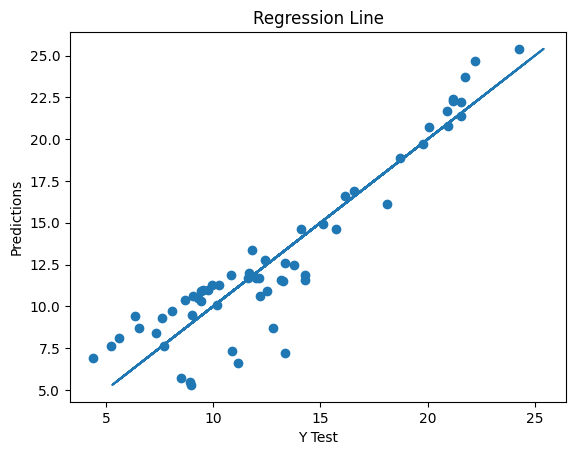

In [ ]:
# Plot Linear
import matplotlib.pyplot as plt
plt.scatter(predictions,Y_test)
plt.plot(Y_test,Y_test)
plt.title("Regression Line")
plt.ylabel("Predictions")
plt.xlabel("Y Test")
plt.show()

In [ ]:
# 5,6,7 We need to Test the M